## Imports 

In [27]:
import os
from datetime import date
from datetime import datetime as dt
import shutil
import pandas as pd
from datetime import datetime

import sqlite3
import pandas as pd
conn = sqlite3.connect('./temp/clickup_sales.db')
cursor = conn.cursor()

from sqlalchemy import create_engine
engine = create_engine('sqlite:///temp/clickup_sales.db', echo=True)

## Data Wranglin --> CSV to df

In [28]:
today = str(date.today()).replace('-','_')
dropzone = f'{os.getcwd()}/dropzone/'
archive = f'{os.getcwd()}/archive/'


In [8]:
""" # rename file
def process_dropzone(dropzone):
    filename = max([f for f in os.listdir(dropzone)], key=lambda xa :   os.path.getctime(os.path.join(dropzone,xa)))
    os.rename(os.path.join(dropzone,filename),os.path.join(dropzone, f'clickup_{today}.csv'))
    new_name = max([f for f in os.listdir(dropzone)], key=lambda xa :   os.path.getctime(os.path.join(dropzone,xa)))
    shutil.move(f"{dropzone}{new_name}", f"{archive}{new_name}") """

' # rename file\ndef process_dropzone(dropzone):\n    filename = max([f for f in os.listdir(dropzone)], key=lambda xa :   os.path.getctime(os.path.join(dropzone,xa)))\n    os.rename(os.path.join(dropzone,filename),os.path.join(dropzone, f\'clickup_{today}.csv\'))\n    new_name = max([f for f in os.listdir(dropzone)], key=lambda xa :   os.path.getctime(os.path.join(dropzone,xa)))\n    shutil.move(f"{dropzone}{new_name}", f"{archive}{new_name}") '

In [9]:
""" #process two files
try:
    process_dropzone(dropzone)
except Exception as e:
    print(e)

 """

' #process two files\ntry:\n    process_dropzone(dropzone)\nexcept Exception as e:\n    print(e)\n\n '

In [10]:
#get latest two files
sorted_lsit = sorted([f for f in os.listdir(archive)], key=lambda xa :   os.path.getctime(os.path.join(archive,xa)))
print(sorted_lsit[:2])

#load files from archive
df1 = pd.read_csv(archive+sorted_lsit[0],error_bad_lines=False )
df2 = pd.read_csv(archive+sorted_lsit[1],error_bad_lines=False )


['clickup_2022_01_15.csv', 'clickup_2022_01_28.csv']


/var/folders/_m/w8ntzwsj26vfm_mzmv382g7w0000gn/T/ipykernel_32439/2875291017.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(archive+sorted_lsit[0],error_bad_lines=False )
/var/folders/_m/w8ntzwsj26vfm_mzmv382g7w0000gn/T/ipykernel_32439/2875291017.py:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df2 = pd.read_csv(archive+sorted_lsit[1],error_bad_lines=False )
b'Skipping line 44: expected 27 fields, saw 28\nSkipping line 111: expected 27 fields, saw 28\nSkipping line 118: expected 27 fields, saw 28\nSkipping line 123: expected 27 fields, saw 28\nSkipping line 154: expected 27 fields, saw 28\nSkipping line 300: expected 27 fields, saw 28\nSkipping line 429: expected 27 fields, saw 28\nSkipping line 584: expected 27 fields, saw 28\nSkipping line 587: expected 27 fields, saw 28\n

In [11]:
#df1.columns

In [12]:
#filter down on account and opportunity list
df1 = df1[df1['List Name'].eq('Accounts & Opportunities')]
df2 = df2[df2['List Name'].eq('Accounts & Opportunities')]

In [13]:

#smaller set of columns
df1 = df1[['Task ID', ' Task Name', 'Status',
       'Date Created Text', 'Start Date Text' ,'Assignees']]
#convert date column to datatime format
df1['Current_Date'] = date.today()
df1['Current_Date'] = pd.to_datetime(df1['Current_Date'])
#df1['Date Created Text'] = df1['Date Created Text'].str[:10]
df1['Date Created Text'] = pd.to_datetime(df1['Date Created Text'].str[:10])
df1['Start Date Text'] = pd.to_datetime(df1['Start Date Text'].str[:10])
#df1['Date Created'] = pd.to_datetime(df1['Date Created'])

In [14]:


#smaller set of columns
df2 = df2[['Task ID', ' Task Name', 'Status', 'Date Created',
       'Date Created Text','Assignees', 'Tags']]
#convert date column to datatime format
df2['Date Created Text'] = df2['Date Created Text'].str[:10]
df2['Date Created Text'] = pd.to_datetime(df2['Date Created Text'].str[:10])

In [15]:
df3 = df1.merge(df2,how='left',left_on='Task ID',right_on='Task ID',suffixes=['_current','_previous'])

In [17]:
#df3.columns

In [18]:
df3 = df3[['Task ID','Assignees_current',' Task Name_current','Status_current','Status_previous','Current_Date','Date Created Text_current',
       'Date Created Text_previous']]

df3.head()

,Task ID,Assignees_current,Task Name_current,Status_current,Status_previous,Current_Date,Date Created Text_current,Date Created Text_previous
0,272at2e,[],VICTORIA MELINDA MILLS BROUILLET,intro call,intro call,2022-01-29,2021-12-29,2021-12-29
1,272at1w,[],NOUMAN SAKHAWAT SAKHAWAT KHAN,closed [lost],closed [lost],2022-01-29,2021-12-29,2021-12-29
2,272at34,[],SAFIYA SULAIMAN RASHID MATAR ALMATROOSHI,intro call,intro call,2022-01-29,2021-12-29,2021-12-29
3,272aryb,[],MUTABAR KHAIDARZODA,unqualified prospect,NaN,2022-01-29,2021-12-29,NaT
4,272aryk,[],SANA SALAMAT SALAMAT JAN,unqualified prospect,closed [lost],2022-01-29,2021-12-29,2021-12-29


In [19]:
#df3.dtypes

In [20]:
df3['DIFF']= df3['Current_Date']-df3['Date Created Text_current'] 
df3

,Task ID,Assignees_current,Task Name_current,Status_current,Status_previous,Current_Date,Date Created Text_current,Date Created Text_previous,DIFF
0,272at2e,[],VICTORIA MELINDA MILLS BROUILLET,intro call,intro call,2022-01-29,2021-12-29,2021-12-29,31 days
1,272at1w,[],NOUMAN SAKHAWAT SAKHAWAT KHAN,closed [lost],closed [lost],2022-01-29,2021-12-29,2021-12-29,31 days
2,272at34,[],SAFIYA SULAIMAN RASHID MATAR ALMATROOSHI,intro call,intro call,2022-01-29,2021-12-29,2021-12-29,31 days
3,272aryb,[],MUTABAR KHAIDARZODA,unqualified prospect,NaN,2022-01-29,2021-12-29,NaT,31 days
4,272aryk,[],SANA SALAMAT SALAMAT JAN,unqualified prospect,closed [lost],2022-01-29,2021-12-29,2021-12-29,31 days
...,...,...,...,...,...,...,...,...,...
143,20dc639,[],SHAIMA SAEED SAIF RASHID ALNAQBI,intro call,intro call,2022-01-29,2022-01-02,2022-01-02,27 days
144,272at1c,[],HOUSSAM MERHI,intro call,intro call,2022-01-29,2021-12-29,2021-12-29,31 days
145,272arze,[],YULIA NORMUKHAMEDOVA,unqualified prospect,closed [lost],2022-01-29,2021-12-29,2021-12-29,31 days
146,272arz9,[],ABDUL ANAS ABDUL HAMEED SAIDUTTY KOTTAYIL ABDU...,intro call,intro call,2022-01-29,2021-12-29,2021-12-29,31 days


In [187]:
df5 = df3[df3['Status_previous'].isna()]
df5.head()

,Task ID,Assignees_current,Task Name_current,Status_current,Status_previous,Current_Date,Date Created Text_current,Date Created Text_previous,DIFF
2,2dam17e,[],ABDULLA HUMAID SULTAN BIN MUWAIZA,unqualified prospect,NaN,2022-01-28,2022-01-25,NaT,3 days
3,2dam1bn,[],ADNAN AHMED MOTIWALA ABDUL WAHID MOTIWALA,unqualified prospect,NaN,2022-01-28,2022-01-25,NaT,3 days
5,2bbqbxh,[Karim],Mughees Qazi,in-development,NaN,2022-01-28,2022-01-18,NaT,10 days
6,2dam18w,[],ABHISHEK SEHGAL GRISH CHANDRA SEHGAL,unqualified prospect,NaN,2022-01-28,2022-01-25,NaT,3 days
7,2dam1a5,[],ADAM JOTHI KUMAR,unqualified prospect,NaN,2022-01-28,2022-01-25,NaT,3 days


In [22]:
df3['Status_previous'].loc[df3['Status_previous'].isnull()] = 'New'

/var/folders/_m/w8ntzwsj26vfm_mzmv382g7w0000gn/T/ipykernel_32439/2833058947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Status_previous'].loc[df3['Status_previous'].isnull()] = 'New'


In [24]:
#Ticket havent moved
df4 = df3[df3['Status_previous']==df3['Status_current']]
df4 = df4[df4['Status_previous']!='closed [lost]']
df4 = df4[df4['Assignees_current']=='[Ese]']
df4.sort_values(by='DIFF',ascending=False)

,Task ID,Assignees_current,Task Name_current,Status_current,Status_previous,Current_Date,Date Created Text_current,Date Created Text_previous,DIFF


In [192]:
df4.columns

Index(['Task ID', 'Assignees_current', ' Task Name_current', 'Status_current',
       'Status_previous', 'Current_Date', 'Date Created Text_current',
       'Date Created Text_previous', 'DIFF'],
      dtype='object')

In [193]:
pd.pivot_table(df3,index='Status_current',columns='Status_previous',values='Task ID',aggfunc='count')

Status_previous,New,agreement sent,closed [lost],in-development,intro call,meeting scheduled,unqualified prospect
Status_current,,,,,,,
agreement sent,13.0,2.0,NaN,NaN,NaN,2.0,NaN
closed [lost],7.0,1.0,38.0,1.0,16.0,NaN,24.0
in-development,6.0,NaN,NaN,2.0,2.0,NaN,1.0
intro call,12.0,NaN,NaN,NaN,30.0,NaN,5.0
unqualified prospect,90.0,NaN,NaN,NaN,NaN,NaN,14.0


In [194]:
pd.pivot_table(df3,index='Status_current',columns='Status_previous',values='DIFF',aggfunc='mean')

Status_previous,New,agreement sent,closed [lost],in-development,intro call,meeting scheduled,unqualified prospect
Status_current,,,,,,,
agreement sent,7 days 18:27:41.538461538,28 days,NaT,NaT,NaT,28 days 12:00:00,NaT
closed [lost],7 days 13:42:51.428571428,30 days,30 days 05:41:03.157894737,31 days,29 days 10:30:00,NaT,30 days
in-development,9 days 04:00:00,NaT,NaT,30 days,30 days 00:00:00,NaT,30 days
intro call,7 days 14:00:00,NaT,NaT,NaT,29 days 14:24:00,NaT,30 days
unqualified prospect,3 days 03:44:00,NaT,NaT,NaT,NaT,NaT,30 days


In [199]:
#How many tickets added?
df3['Status_previous'][df3['Status_previous']=='New'].count()

128

In [204]:
df3.shape

(266, 9)

In [213]:
#filtering on Ese or unassigned
assignee_ese = ['[Ese]']
ese = df3['Assignees_current'].isin(assignee_ese)
ese = df3[ese]
ese

,Task ID,Assignees_current,Task Name_current,Status_current,Status_previous,Current_Date,Date Created Text_current,Date Created Text_previous,DIFF
4,272at2j,[Ese],AYUSH KAROLIA ARVIND KAROLIA,closed [lost],agreement sent,2022-01-28,2021-12-29,2021-12-29,30 days
9,2dam17h,[Ese],Abdulla Husain Saeed Al Saadi,unqualified prospect,New,2022-01-28,2022-01-25,NaT,3 days
10,272at2e,[Ese],VICTORIA MELINDA MILLS BROUILLET,intro call,intro call,2022-01-28,2021-12-29,2021-12-29,30 days
14,272aryp,[Ese],ASAD SHAHZAD TAHIR MEHMOOD,in-development,in-development,2022-01-28,2021-12-29,2021-12-29,30 days
15,272aryr,[Ese],ADEL HUSSAIN H ALSHASRMAN,intro call,intro call,2022-01-28,2021-12-29,2021-12-29,30 days
...,...,...,...,...,...,...,...,...,...
246,2bbqbvv,[Ese],ABBAS ALA HAMID,intro call,New,2022-01-28,2022-01-18,NaT,10 days
248,20dc639,[Ese],SHAIMA SAEED SAIF RASHID ALNAQBI,intro call,intro call,2022-01-28,2022-01-02,2022-01-02,26 days
250,272arz1,[Ese],MUHAMMAD JUNAID KHAN QAISER NASEEM KHAN,in-development,intro call,2022-01-28,2021-12-29,2021-12-29,30 days
259,272at1r,[Ese],Abdulrazeq Mohamed Ahmed Mohamed,intro call,intro call,2022-01-28,2021-12-29,2021-12-29,30 days


In [214]:
pd.pivot_table(ese,index='Status_current',columns='Status_previous',values='Task ID',aggfunc='count')

Status_previous,New,agreement sent,in-development,intro call,meeting scheduled,unqualified prospect
Status_current,,,,,,
agreement sent,NaN,2.0,NaN,NaN,2.0,NaN
closed [lost],1.0,1.0,1.0,15.0,NaN,4.0
in-development,NaN,NaN,2.0,2.0,NaN,1.0
intro call,12.0,NaN,NaN,30.0,NaN,5.0
unqualified prospect,4.0,NaN,NaN,NaN,NaN,2.0


In [216]:
#lost
lost_ese = ese[ese['Status_current']=='closed [lost]']
lost_ese = lost_ese[lost_ese['Status_current']!=lost_ese['Status_previous']]
pd.pivot_table(lost_ese,index='Status_current',columns='Status_previous',values='Task ID',aggfunc='count')

Status_previous,New,agreement sent,in-development,intro call,unqualified prospect
Status_current,,,,,
closed [lost],1,1,1,15,4


In [217]:
#development
dev_ese = ese[ese['Status_current']=='in-development']
dev_ese = dev_ese[dev_ese['Status_current']!=dev_ese['Status_previous']]
pd.pivot_table(dev_ese,index='Status_current',columns='Status_previous',values='Task ID',aggfunc='count')

Status_previous,intro call,unqualified prospect
Status_current,,
in-development,2,1


In [218]:
#agreement sent
agrement_ese = ese[ese['Status_current']=='agreement sent']
agrement_ese = agrement_ese[agrement_ese['Status_current']!=agrement_ese['Status_previous']]
pd.pivot_table(agrement_ese,index='Status_current',columns='Status_previous',values='Task ID',aggfunc='count')

Status_previous,meeting scheduled
Status_current,
agreement sent,2


In [219]:
#agreement sent
intro_ese = ese[ese['Status_current']=='intro call']
intro_ese = intro_ese[intro_ese['Status_current']!=intro_ese['Status_previous']]
pd.pivot_table(intro_ese,index='Status_current',columns='Status_previous',values='Task ID',aggfunc='count')


Status_previous,New,unqualified prospect
Status_current,,
intro call,12,5


In [25]:
#Ticket havent moved
unchanged_ese = ese[ese['Status_previous']==ese['Status_current']]
unchanged_ese = unchanged_ese[unchanged_ese['Status_previous']!='closed [lost]']
#unchanged_ese = unchanged_ese[unchanged_ese['Assignees_current']=='[Ese]']
unchanged_ese.sort_values(by=['Status_current','DIFF'],ascending=False)

NameError: name 'ese' is not defined

In [252]:
changed_ese = ese[ese['Status_previous']!=ese['Status_current']]
changed_ese_pivot =  pd.pivot_table(changed_ese,index='Status_current',columns='Status_previous',values='Task ID',aggfunc='count')
changed_ese_pivot

Status_previous,New,agreement sent,in-development,intro call,meeting scheduled,unqualified prospect
Status_current,,,,,,
agreement sent,NaN,NaN,NaN,NaN,2.0,NaN
closed [lost],1.0,1.0,1.0,15.0,NaN,4.0
in-development,NaN,NaN,NaN,2.0,NaN,1.0
intro call,12.0,NaN,NaN,NaN,NaN,5.0
unqualified prospect,4.0,NaN,NaN,NaN,NaN,NaN


In [237]:
changed_ese

,Task ID,Assignees_current,Task Name_current,Status_current,Status_previous,Current_Date,Date Created Text_current,Date Created Text_previous,DIFF
4,272at2j,[Ese],AYUSH KAROLIA ARVIND KAROLIA,closed [lost],agreement sent,2022-01-28,2021-12-29,2021-12-29,30 days
9,2dam17h,[Ese],Abdulla Husain Saeed Al Saadi,unqualified prospect,New,2022-01-28,2022-01-25,NaT,3 days
18,2bbqbwd,[Ese],ABDALQADER N A DARABAIH HESHMIYA,intro call,New,2022-01-28,2022-01-18,NaT,10 days
23,272at20,[Ese],ZIWEI ZHOU,in-development,intro call,2022-01-28,2021-12-29,2021-12-29,30 days
25,272at15,[Ese],Ali abdul Jabbar Abdulla Ali Gargash,closed [lost],intro call,2022-01-28,2021-12-29,2021-12-29,30 days
26,272at2y,[Ese],AHMAD SALAH AHMAD ABDULRAHMAN BAYZAR,closed [lost],unqualified prospect,2022-01-28,2021-12-29,2021-12-29,30 days
34,272arz7,[Ese],ABDELLAH MAAREGUEB,closed [lost],intro call,2022-01-28,2021-12-29,2021-12-29,30 days
36,272at16,[Ese],IFEAKACHUKWU THEOPHILUS UGBOME,intro call,unqualified prospect,2022-01-28,2021-12-29,2021-12-29,30 days
40,272ary9,[Ese],MANJIT KAUR SANTA SINGH,closed [lost],intro call,2022-01-28,2021-12-29,2021-12-29,30 days
41,2dam17x,[Ese],Abdullah Farani,closed [lost],New,2022-01-28,2022-01-25,NaT,3 days


## Report Final Components

In [260]:
# 1- How many total contacted?
len(changed_ese)

48

In [276]:
# 2- How many ended up in which status?
summary_ese = changed_ese['Status_current'].value_counts()
summary_ese =pd.DataFrame(summary_ese)
summary_ese['Percentage'] = summary_ese['Status_current'] / summary_ese['Status_current'].sum() *100
summary_ese['Percentage']  = summary_ese['Percentage'].round(2)
summary_ese['Percentage']  = pd.Series(["{0:.2f}%".format(val ) for val in summary_ese['Percentage']], index = summary_ese.index)

summary_ese

,Status_current,Percentage
closed [lost],22,45.83%
intro call,17,35.42%
unqualified prospect,4,8.33%
in-development,3,6.25%
agreement sent,2,4.17%


In [278]:
# 4- All time summary
all_time_summary_ese = ese['Status_current'].value_counts()
all_time_summary_ese =pd.DataFrame(all_time_summary_ese)
all_time_summary_ese['Percentage'] = all_time_summary_ese['Status_current'] / all_time_summary_ese['Status_current'].sum() *100
all_time_summary_ese['Percentage']  = all_time_summary_ese['Percentage'].round(2)
all_time_summary_ese['Percentage']  = pd.Series(["{0:.2f}%".format(val ) for val in all_time_summary_ese['Percentage']], index = all_time_summary_ese.index)

all_time_summary_ese

,Status_current,Percentage
intro call,47,55.95%
closed [lost],22,26.19%
unqualified prospect,6,7.14%
in-development,5,5.95%
agreement sent,4,4.76%


In [279]:
# 5-Statuses that moved
changed_ese = ese[ese['Status_previous']!=ese['Status_current']]
changed_ese_pivot =  pd.pivot_table(changed_ese,index='Status_current',columns='Status_previous',values='Task ID',aggfunc='count')
changed_ese_pivot

Status_previous,New,agreement sent,in-development,intro call,meeting scheduled,unqualified prospect
Status_current,,,,,,
agreement sent,NaN,NaN,NaN,NaN,2.0,NaN
closed [lost],1.0,1.0,1.0,15.0,NaN,4.0
in-development,NaN,NaN,NaN,2.0,NaN,1.0
intro call,12.0,NaN,NaN,NaN,NaN,5.0
unqualified prospect,4.0,NaN,NaN,NaN,NaN,NaN


In [280]:
# 6-Ticket havent moved
unchanged_ese = ese[ese['Status_previous']==ese['Status_current']]
unchanged_ese = unchanged_ese[unchanged_ese['Status_previous']!='closed [lost]']
#unchanged_ese = unchanged_ese[unchanged_ese['Assignees_current']=='[Ese]']
unchanged_ese.sort_values(by=['Status_current','DIFF'],ascending=False)

,Task ID,Assignees_current,Task Name_current,Status_current,Status_previous,Current_Date,Date Created Text_current,Date Created Text_previous,DIFF
43,272arzm,[Ese],HELEN ELIZABETH HUGHES,unqualified prospect,unqualified prospect,2022-01-28,2021-12-29,2021-12-29,30 days
238,272at3b,[Ese],AHMED GHANIMSOHRAB MOHAMMED AHLI,unqualified prospect,unqualified prospect,2022-01-28,2021-12-29,2021-12-29,30 days
10,272at2e,[Ese],VICTORIA MELINDA MILLS BROUILLET,intro call,intro call,2022-01-28,2021-12-29,2021-12-29,30 days
15,272aryr,[Ese],ADEL HUSSAIN H ALSHASRMAN,intro call,intro call,2022-01-28,2021-12-29,2021-12-29,30 days
19,272at1h,[Ese],FATIMA LAHER,intro call,intro call,2022-01-28,2021-12-29,2021-12-29,30 days
35,272at1y,[Ese],MUHAMMAD NAMATULLAH HAZOOR MUHAMMAD,intro call,intro call,2022-01-28,2021-12-29,2021-12-29,30 days
48,272at33,[Ese],HANI ISSA SALLOUM,intro call,intro call,2022-01-28,2021-12-29,2021-12-29,30 days
49,272aryw,[Ese],TETIANA ZAHER,intro call,intro call,2022-01-28,2021-12-29,2021-12-29,30 days
51,272at1u,[Ese],HASNAIN NAEEM NAEEM GUL,intro call,intro call,2022-01-28,2021-12-29,2021-12-29,30 days
56,272aryu,[Ese],ahmad asmail abdulla almas,intro call,intro call,2022-01-28,2021-12-29,2021-12-29,30 days


## Dashboard creation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [247]:
import pandas as pd
import numpy as np
import jinja2

/var/folders/_m/w8ntzwsj26vfm_mzmv382g7w0000gn/T/ipykernel_25629/3917355542.py:13: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = template.render(my_table=styler.render())


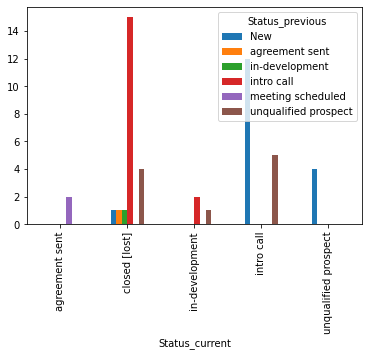

In [254]:
df = changed_ese_pivot


def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return f'color: {color}'

styler = df.style.applymap(color_negative_red)

# Template handling
env = jinja2.Environment(loader=jinja2.FileSystemLoader(searchpath=''))
template = env.get_template('template.html')
html = template.render(my_table=styler.render())

# Plot
ax = df.plot.bar()
fig = ax.get_figure()
fig.savefig('plot.svg')

# Write the HTML file
with open('report.html', 'w') as f:
    f.write(html)

pandas.io.formats.style.Styler

## Dash

In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd

data = pd.read_csv("./temp/avocado.csv")
data = data.query("type == 'conventional' and region == 'Albany'")
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
data.sort_values("Date", inplace=True)

external_stylesheets = [
    {
        "href": "https://fonts.googleapis.com/css2?"
        "family=Lato:wght@400;700&display=swap",
        "rel": "stylesheet",
    },
]
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.title = "Avocado Analytics: Understand Your Avocados!"

app.layout = html.Div(
    children=[
        html.Div(
            children=[
                html.P(children="🥑", className="header-emoji"),
                html.H1(
                    children="Avocado Analytics", className="header-title"
                ),
                html.P(
                    children="Analyze the behavior of avocado prices"
                    " and the number of avocados sold in the US"
                    " between 2015 and 2018",
                    className="header-description",
                ),
            ],
            className="header",
        ),
        html.Div(
            children=[
                html.Div(
                    children=dcc.Graph(
                        id="price-chart",
                        config={"displayModeBar": False},
                        figure={
                            "data": [
                                {
                                    "x": data["Date"],
                                    "y": data["AveragePrice"],
                                    "type": "lines",
                                    "hovertemplate": "$%{y:.2f}"
                                                     "<extra></extra>",
                                },
                            ],
                            "layout": {
                                "title": {
                                    "text": "Average Price of Avocados",
                                    "x": 0.05,
                                    "xanchor": "left",
                                },
                                "xaxis": {"fixedrange": True},
                                "yaxis": {
                                    "tickprefix": "$",
                                    "fixedrange": True,
                                },
                                "colorway": ["#17B897"],
                            },
                        },
                    ),
                    className="card",
                ),
                html.Div(
                    children=dcc.Graph(
                        id="volume-chart",
                        config={"displayModeBar": False},
                        figure={
                            "data": [
                                {
                                    "x": data["Date"],
                                    "y": data["Total Volume"],
                                    "type": "lines",
                                },
                            ],
                            "layout": {
                                "title": {
                                    "text": "Avocados Sold",
                                    "x": 0.05,
                                    "xanchor": "left",
                                },
                                "xaxis": {"fixedrange": True},
                                "yaxis": {"fixedrange": True},
                                "colorway": ["#E12D39"],
                            },
                        },
                    ),
                    className="card",
                ),
            ],
            className="wrapper",
        ),
    ]
)

if __name__ == "__main__":
    app.run_server(debug=True)

/var/folders/_m/w8ntzwsj26vfm_mzmv382g7w0000gn/T/ipykernel_29753/1994044060.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/_m/w8ntzwsj26vfm_mzmv382g7w0000gn/T/ipykernel_29753/1994044060.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


/Users/karimitani/Documents/github/webscraping/webscraping_venv/lib/python3.8/site-packages/traitlets/traitlets.py:2202: FutureWarning: Supporting extra quotes around strings is deprecated in traitlets 5.0. You can use 'hmac-sha256' instead of '"hmac-sha256"' if you require traitlets >=5.
  warn(
/Users/karimitani/Documents/github/webscraping/webscraping_venv/lib/python3.8/site-packages/traitlets/traitlets.py:2157: FutureWarning: Supporting extra quotes around Bytes is deprecated in traitlets 5.0. Use '8b33be82-d5c1-4730-b511-73b56f238e12' instead of 'b"8b33be82-d5c1-4730-b511-73b56f238e12"'.
  warn(
Traceback (most recent call last):
  File "/Users/karimitani/Documents/github/webscraping/webscraping_venv/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/karimitani/Documents/github/webscraping/webscraping_venv/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.initialize(

SystemExit: 1

/Users/karimitani/Documents/github/webscraping/webscraping_venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3259: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Database setup

In [86]:
""" sql = {}
sql['createLeadsTable'] = \
    """
    CREATE TABLE LEADS_STATUS (
        TASK_ID TEXT, 
        TASK_NAME TEXT, 
        STATUS TEXT, 
        DATE_CREATED TEXT,
        START_DATE TEXT,
        ASSIGNEE TEXT,
        AUDIT_DATE TEXT
    )
    """ """

In [87]:
""" cursor.execute(sql['createLeadsTable'])
conn.commit() """

### load dataframes into database

In [2]:
""" df2 = pd.read_csv(archive+sorted_lsit[1],error_bad_lines=False )
df2 = df2[df2['List Name'].eq('Accounts & Opportunities')]
df2 = df2[['Task ID', ' Task Name', 'Status',
       'Date Created Text', 'Start Date Text' ,'Assignees']]
df2['AUDIT_DATE'] = '2022-01-28'
df2['AUDIT_DATE'] = pd.to_datetime(df2['AUDIT_DATE'])
df2['Date Created Text'] = pd.to_datetime(df2['Date Created Text'].str[:10])
df2['Start Date Text'] = pd.to_datetime(df2['Start Date Text'].str[:10])
#df2.index.rename('UID', inplace=True)
df2.reset_index(drop=True, inplace=True)
columns = {'Task ID' : 'TASK_ID', 
' Task Name' : 'TASK_NAME', 
'Status' : 'STATUS', 
'Date Created Text': 'DATE_CREATED',
'Start Date Text' : 'START_DATE', 
'Assignees' : 'ASSIGNEE', 
'Current_Date' : 'AUDIT_DATE'}

df2.rename(columns=columns, inplace=True)
df2
df2.to_sql('LEADS_STATUS', con=engine,index=True,  if_exists='append') """

" df2 = pd.read_csv(archive+sorted_lsit[1],error_bad_lines=False )\ndf2 = df2[df2['List Name'].eq('Accounts & Opportunities')]\ndf2 = df2[['Task ID', ' Task Name', 'Status',\n       'Date Created Text', 'Start Date Text' ,'Assignees']]\ndf2['AUDIT_DATE'] = '2022-01-28'\ndf2['AUDIT_DATE'] = pd.to_datetime(df2['AUDIT_DATE'])\ndf2['Date Created Text'] = pd.to_datetime(df2['Date Created Text'].str[:10])\ndf2['Start Date Text'] = pd.to_datetime(df2['Start Date Text'].str[:10])\n#df2.index.rename('UID', inplace=True)\ndf2.reset_index(drop=True, inplace=True)\ncolumns = {'Task ID' : 'TASK_ID', \n' Task Name' : 'TASK_NAME', \n'Status' : 'STATUS', \n'Date Created Text': 'DATE_CREATED',\n'Start Date Text' : 'START_DATE', \n'Assignees' : 'ASSIGNEE', \n'Current_Date' : 'AUDIT_DATE'}\n\ndf2.rename(columns=columns, inplace=True)\ndf2\ndf2.to_sql('LEADS_STATUS', con=engine,index=True,  if_exists='append') "

## Database queries --> dataframes

In [29]:

dates = pd.read_sql("SELECT DISTINCT AUDIT_DATE FROM LEADS_STATUS order by AUDIT_DATE desc",conn)
most_recent_audit = dates.iloc[0,0]
previous_audit = dates.iloc[1,0]


In [30]:
current_audit = pd.read_sql(f"SELECT  * FROM LEADS_STATUS WHERE AUDIT_DATE = '{most_recent_audit}'",conn)
current_audit.head()

,index,TASK_ID,TASK_NAME,STATUS,DATE_CREATED,START_DATE,ASSIGNEE,AUDIT_DATE
0,0,272at38,ZAYNAH SERAPHINA REHANA BROWN,closed [lost],2021-12-29 00:00:00.000000,None,[Ese],2022-01-28 00:00:00.000000
1,1,272at0u,Kai John Camfield,closed [lost],2021-12-29 00:00:00.000000,None,[Ese],2022-01-28 00:00:00.000000
2,2,2dam17e,ABDULLA HUMAID SULTAN BIN MUWAIZA,unqualified prospect,2022-01-25 00:00:00.000000,None,[],2022-01-28 00:00:00.000000
3,3,2dam1bn,ADNAN AHMED MOTIWALA ABDUL WAHID MOTIWALA,unqualified prospect,2022-01-25 00:00:00.000000,None,[],2022-01-28 00:00:00.000000
4,4,272at2j,AYUSH KAROLIA ARVIND KAROLIA,closed [lost],2021-12-29 00:00:00.000000,None,[Ese],2022-01-28 00:00:00.000000


### 1- How many total contacted? 

In [31]:

analysis_sql = {}
analysis_sql_1_1= f"""
    SELECT * FROM LEADS_STATUS
    WHERE ASSIGNEE = '[Ese]'
        AND AUDIT_DATE = '{most_recent_audit}'
"""

analysis_sql_1_2= f"""
    SELECT * FROM LEADS_STATUS
    WHERE ASSIGNEE = '[Ese]'
        AND AUDIT_DATE = '{previous_audit}'
"""

analysis_1_1 = pd.read_sql(analysis_sql_1_1 ,conn)
analysis_1_2 = pd.read_sql(analysis_sql_1_2,conn)

analysis_1_3 = analysis_1_1.merge(analysis_1_2,how='left',left_on='TASK_ID',right_on='TASK_ID',suffixes=['_current','_previous'])
analysis_1_3 = analysis_1_3[analysis_1_3['STATUS_current']!=analysis_1_3['STATUS_previous']]
analysis_1_3['STATUS_previous'][analysis_1_3['STATUS_previous'].isnull()] = 'New'


#Number of ticket that changed status over the week
print(len(analysis_1_3))
analysis_1_3.head()



74


,index_current,TASK_ID,TASK_NAME_current,STATUS_current,DATE_CREATED_current,START_DATE_current,ASSIGNEE_current,AUDIT_DATE_current,index_previous,TASK_NAME_previous,STATUS_previous,DATE_CREATED_previous,START_DATE_previous,ASSIGNEE_previous,AUDIT_DATE_previous
1,1,272at0u,Kai John Camfield,closed [lost],2021-12-29 00:00:00.000000,None,[Ese],2022-01-28 00:00:00.000000,NaN,NaN,New,NaN,NaN,NaN,NaN
2,4,272at2j,AYUSH KAROLIA ARVIND KAROLIA,closed [lost],2021-12-29 00:00:00.000000,None,[Ese],2022-01-28 00:00:00.000000,36.0,AYUSH KAROLIA ARVIND KAROLIA,agreement sent,2021-12-29 00:00:00.000000,None,[Ese],2022-01-15 00:00:00.000000
3,8,272at0t,MORGAN ARWEL EMRHYS THOMAS,closed [lost],2021-12-29 00:00:00.000000,None,[Ese],2022-01-28 00:00:00.000000,NaN,NaN,New,NaN,NaN,NaN,NaN
4,9,2dam17h,Abdulla Husain Saeed Al Saadi,unqualified prospect,2022-01-25 00:00:00.000000,None,[Ese],2022-01-28 00:00:00.000000,NaN,NaN,New,NaN,NaN,NaN,NaN
6,13,272aryk,SANA SALAMAT SALAMAT JAN,closed [lost],2021-12-29 00:00:00.000000,None,[Ese],2022-01-28 00:00:00.000000,NaN,NaN,New,NaN,NaN,NaN,NaN


### 2- How many ended up in which status over the past week?

In [39]:
analysis_2_1 = analysis_1_3[['STATUS_current','STATUS_previous']]
analysis_2_1 = analysis_2_1['STATUS_current'].value_counts()
analysis_2_1 = pd.DataFrame(analysis_2_1)
analysis_2_1['Percentage'] = analysis_2_1['STATUS_current'] / analysis_2_1['STATUS_current'].sum() *100
analysis_2_1['Percentage']  = pd.Series(["{0:.2f}%".format(val ) for val in analysis_2_1['Percentage']], index = analysis_2_1.index)



result_closed_lost = analysis_2_1.loc['closed [lost]']['STATUS_current']
result_intro = analysis_2_1.loc['intro call']['STATUS_current']
result_dev = analysis_2_1.loc['in-development']['STATUS_current']
result_agmnt = analysis_2_1.loc['agreement sent']['STATUS_current']
#result_closed_lost = analysis_2_1.loc['closed [lost]']['STATUS_current']
analysis_2_1



,STATUS_current,Percentage
closed [lost],46,62.16%
intro call,17,22.97%
unqualified prospect,6,8.11%
in-development,3,4.05%
agreement sent,2,2.70%


### 3- Direction of movement between statuses

In [272]:
analysis_3_1 =  pd.pivot_table(analysis_1_3,index='STATUS_current',columns='STATUS_previous',values='TASK_ID',aggfunc='count')
analysis_3_1

STATUS_previous,New,agreement sent,in-development,intro call,meeting scheduled
STATUS_current,,,,,
agreement sent,NaN,NaN,NaN,NaN,2.0
closed [lost],28.0,1.0,1.0,16.0,NaN
in-development,1.0,NaN,NaN,2.0,NaN
intro call,17.0,NaN,NaN,NaN,NaN
unqualified prospect,6.0,NaN,NaN,NaN,NaN


### 4-  Tickets that havent moved

In [32]:
analysis_4_1 = analysis_1_1.merge(analysis_1_2,how='left',left_on='TASK_ID',right_on='TASK_ID',suffixes=['_current','_previous'])
analysis_4_1 = analysis_4_1[analysis_4_1['STATUS_current']==analysis_4_1['STATUS_previous']]
analysis_4_1 = analysis_4_1[['TASK_ID', 'TASK_NAME_current', 'STATUS_current','DATE_CREATED_current', 'AUDIT_DATE_current', 'ASSIGNEE_current']]
analysis_4_1['AUDIT_DATE_current'] =  pd.to_datetime(analysis_4_1['AUDIT_DATE_current'])
analysis_4_1['DATE_CREATED_current'] =  pd.to_datetime(analysis_4_1['DATE_CREATED_current'])
analysis_4_1['DIFF'] = analysis_4_1['AUDIT_DATE_current']-analysis_4_1['DATE_CREATED_current']
analysis_4_1= analysis_4_1[analysis_4_1['STATUS_current']!='closed [lost]']
analysis_4_1

,TASK_ID,TASK_NAME_current,STATUS_current,DATE_CREATED_current,AUDIT_DATE_current,ASSIGNEE_current,DIFF
5,272at2e,VICTORIA MELINDA MILLS BROUILLET,intro call,2021-12-29,2022-01-28,[Ese],30 days
7,272aryp,ASAD SHAHZAD TAHIR MEHMOOD,in-development,2021-12-29,2022-01-28,[Ese],30 days
8,272aryr,ADEL HUSSAIN H ALSHASRMAN,intro call,2021-12-29,2022-01-28,[Ese],30 days
10,272at1h,FATIMA LAHER,intro call,2021-12-29,2022-01-28,[Ese],30 days
20,272at1y,MUHAMMAD NAMATULLAH HAZOOR MUHAMMAD,intro call,2021-12-29,2022-01-28,[Ese],30 days
29,272at33,HANI ISSA SALLOUM,intro call,2021-12-29,2022-01-28,[Ese],30 days
30,272aryw,TETIANA ZAHER,intro call,2021-12-29,2022-01-28,[Ese],30 days
32,272at1u,HASNAIN NAEEM NAEEM GUL,intro call,2021-12-29,2022-01-28,[Ese],30 days
36,272aryu,ahmad asmail abdulla almas,intro call,2021-12-29,2022-01-28,[Ese],30 days
39,272at3c,KHURRAM ALI,intro call,2021-12-29,2022-01-28,[Ese],30 days


### 5- How many new leads contacted?

In [304]:

analysis_sql = {}
analysis_sql_1_1= f"""
    SELECT * FROM LEADS_STATUS
    WHERE ASSIGNEE = '[Ese]'
        AND AUDIT_DATE = '{most_recent_audit}'
"""

analysis_sql_1_2= f"""
    SELECT * FROM LEADS_STATUS
    WHERE ASSIGNEE = '[Ese]'
        AND AUDIT_DATE = '{previous_audit}'
"""

analysis_1_1 = pd.read_sql(analysis_sql_1_1 ,conn)
analysis_1_2 = pd.read_sql(analysis_sql_1_2,conn)

analysis_5_1 = analysis_1_1.merge(analysis_1_2,how='left',left_on='TASK_ID',right_on='TASK_ID',suffixes=['_current','_previous'])
analysis_5_1 = analysis_5_1[analysis_5_1['STATUS_current']!=analysis_5_1['STATUS_previous']]
analysis_5_1['STATUS_previous'][analysis_5_1['STATUS_previous'].isnull()] = 'New'


#Number of ticket that changed status over the week

analysis_5_1 = analysis_5_1[(analysis_5_1['STATUS_previous'].isin(['New','unqualified prospect'])) & (analysis_5_1['STATUS_current']!='unqualified prospect')]
len(analysis_5_1)


46